# SI 618 WN Project Part III




# Project I - Project II - Project III
This project is an extension of project I. We included the beginning of this notebook at Project 1 in order to see the progression from the initial exploratory data analysis, to project II which focuses on analyzing the variables at a deeper level. Project III focuses on fitting the best model to predict egg prices. We begin by preprocessing the data, tuning our models, and building an ensemble.

## Project 1 
 1. Overview
 2. Motivation
 3. Data Sources
 4. Data Description
 5. Data Manipulation
 6. Data Visualization

## Project 2
 1. Descriptive
 2. Inferential 
 3. Graphical
 4. Comparitive
 5. Multivariate
 6. Synthesis
 7. Conclusion
 8. Reflection

 ## Project 3
 1. Preprocessing Data
 2. Analysis

## Cracking the Economy
#### Analyzing the Relationship Between Egg Prices and Unemployment in the U.S. (1980-2024)

## Team Members & uniqname

- Sruthi Chatrathi **sruthic**
- Lena Choi **lenachoi**
- Robert Collis **collis**


## Overview

In recent years, the rising cost of eggs has become a major topic in the news cycle, driven by factors such as bird flu outbreaks, supply chain disruptions, and inflation. This project seeks to explore whether economic conditions, specifically unemployment rates across the United States, have any correlation with egg price fluctuations over time. 

Using data from the Bureau of Labor Statistics, we will analyze trends in egg prices alongside regional unemployment rates across the Northeast, Midwest, South, and West from 1980-2024. By examining these relationships on a regional level, we can determine whether certain areas of the U.S. experience stronger or weaker connections between economic downturns and the cost of essential grocery items like eggs. This project will provide insights into how economic conditions shape consumer costs differently across the country and whether some regions are more resilient or vulnerable to price shocks.




## Motivation 
1. Does a rise in regional unemployment correlate with changes in egg prices, and if so, is this relationship consistent across different regions of the U.S.?
2. Which U.S. regions are most and least affected by economic downturns in terms of egg price fluctuations?
3. Have past economic recessions resulted in noticeable changes in the relationship between egg prices and unemployment? (Example, the 1980's, 2008 financial crisis, and COVID-19 pandemic).

By answering these questions, we hope to gain a deeper understanding of how economic fluctuations impact food affordability at a regional level. This analysis could provide insights into whether unemployment plays a role in essential grocery pricing, or if other factors are the dominant forces. Additionally, it may show potential disparities in economic resilience across different parts of the country, helping to explain why some regions may face greater hardships in securing affordable food during recessions. 

## Data Sources
> List the two (or more) sources of data that you'll be using.  Provide URLs where appropriate.	Explain how the two (or more) datasets complement each other

The data sources come from  the U.S. Bureau of Labor Statistics https://www.bls.gov/

https://data.bls.gov/dataQuery/find?st=0&r=20&q=unemployment&fq=cg:[Geography]&more=0&fq=cc:[Census+Regions]

https://data.bls.gov/dataViewer/view/timeseries/APU0000708111

### How do these relate?

The egg price dataset captures the fluctuations in the cost of a staple food item over time, while unememployment datasets across U.S. regions provide a measure of economic conditions. Together, they allow for an analysis of whether economic conditions influence essential grocery prices, if this relationship varies by region, or if there's no relationship all together. 




	


In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import scipy.stats as stats

from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # to compare with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import auc, confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score
warnings.simplefilter(action='ignore', category=FutureWarning)

In [237]:
# Loading the datasets
egg_prices = pd.read_csv("eggs_1980_2025.csv")
unemployment_northeast = pd.read_csv("unemployment_northeast_1980_2025.csv")
unemployment_midwest=pd.read_csv("unemployment_midwest_1980_2025.csv")
unemployment_south=pd.read_csv("unemployment_south_1980_2025.csv")
unemployment_west=pd.read_csv("unemployment_west_1980_2025.csv")


In [238]:
egg_prices.head()
#unemployment_northeast.head()

,Series ID,Year,Period,Label,Value
0,APU0000708111,1980,M01,1980 Jan,0.879
1,APU0000708111,1980,M02,1980 Feb,0.774
2,APU0000708111,1980,M03,1980 Mar,0.812
3,APU0000708111,1980,M04,1980 Apr,0.797
4,APU0000708111,1980,M05,1980 May,0.737


In [239]:
# lowercase all columns for easier manipulation
egg_prices.columns = egg_prices.columns.str.lower()
egg_prices

,series id,year,period,label,value
0,APU0000708111,1980,M01,1980 Jan,0.879
1,APU0000708111,1980,M02,1980 Feb,0.774
2,APU0000708111,1980,M03,1980 Mar,0.812
3,APU0000708111,1980,M04,1980 Apr,0.797
4,APU0000708111,1980,M05,1980 May,0.737
...,...,...,...,...,...
536,APU0000708111,2024,M09,2024 Sep,3.821
537,APU0000708111,2024,M10,2024 Oct,3.370
538,APU0000708111,2024,M11,2024 Nov,3.649
539,APU0000708111,2024,M12,2024 Dec,4.146


In [240]:
# Renamed 'series id' column to id
egg_prices.rename(columns = {'series id': 'id'}, inplace= True)
egg_prices

,id,year,period,label,value
0,APU0000708111,1980,M01,1980 Jan,0.879
1,APU0000708111,1980,M02,1980 Feb,0.774
2,APU0000708111,1980,M03,1980 Mar,0.812
3,APU0000708111,1980,M04,1980 Apr,0.797
4,APU0000708111,1980,M05,1980 May,0.737
...,...,...,...,...,...
536,APU0000708111,2024,M09,2024 Sep,3.821
537,APU0000708111,2024,M10,2024 Oct,3.370
538,APU0000708111,2024,M11,2024 Nov,3.649
539,APU0000708111,2024,M12,2024 Dec,4.146


In [241]:
# Check for null values in the egg_prices
egg_prices.isnull().sum()

id        0
year      0
period    0
label     0
value     0
dtype: int64

##### Null values for the egg_prices DataFrame

There are no null values for the egg prices DataFrame

In [242]:
# check for null values in the unemployment DataFrames
print(unemployment_northeast.isnull().sum())
print(unemployment_west.isnull().sum())
print(unemployment_midwest.isnull().sum())
print(unemployment_south.isnull().sum())

Series ID    0
Year         0
Period       0
Label        0
Value        0
dtype: int64
Series ID    0
Year         0
Period       0
Label        0
Value        0
dtype: int64
Series ID    0
Year         0
Period       0
Label        0
Value        0
dtype: int64
Series ID    0
Year         0
Period       0
Label        0
Value        0
dtype: int64


##### Null values for unemployment DataFrames
There are no null values for the employment DataFrames.

In [243]:
# Convert monthly data to yearly averages
def process_unemployment_data(df, region_name):
    df = df.groupby("Year")["Value"].mean().reset_index()
    df.rename(columns={"Value": f"{region_name}_unemployment"}, inplace=True)
    return df

In [244]:
# Process each regional unemployment dataset
northeast_unemployment = process_unemployment_data(unemployment_northeast, "northeast")
midwest_unemployment = process_unemployment_data(unemployment_midwest, "midwest")
south_unemployment = process_unemployment_data(unemployment_south, "south")
west_unemployment = process_unemployment_data(unemployment_west, "west")

In [245]:
# Merge unemployment data
unemployment_df = northeast_unemployment \
    .merge(midwest_unemployment, on="Year") \
    .merge(south_unemployment, on="Year") \
    .merge(west_unemployment, on="Year")

In [246]:
# Lowercase the columns names for easier data manipulation
unemployment_df.columns = unemployment_df.columns.str.lower()


In [247]:
unemployment_df.head()

,year,northeast_unemployment,midwest_unemployment,south_unemployment,west_unemployment
0,1980,7.150000,8.183333,6.400000,6.950000
1,1981,7.425000,8.608333,7.025000,7.425000
2,1982,8.925000,11.091667,8.950000,9.866667
3,1983,8.725000,10.866667,9.225000,9.591667
4,1984,6.816667,8.416667,7.283333,7.533333


In [248]:
# Process egg prices dataset (convert to yearly averages)
egg_prices = egg_prices.groupby("year")["value"].mean().reset_index()
egg_prices.rename(columns={"value": "egg_price"}, inplace=True)

## Data Manipulation

In [249]:
# Merge with egg prices
eggflation = egg_prices.merge(unemployment_df, on="year")

In [250]:
# Creating a column for national unemployment by finding the average unemployment across all regions 
eggflation['national_unemployment'] = eggflation[['northeast_unemployment', 'midwest_unemployment', 'south_unemployment', 'west_unemployment']].mean(axis = 1)


In [251]:
eggflation.head(10)

,year,egg_price,northeast_unemployment,midwest_unemployment,south_unemployment,west_unemployment,national_unemployment
0,1980,0.843833,7.150000,8.183333,6.400000,6.950000,7.170833
1,1981,0.898667,7.425000,8.608333,7.025000,7.425000,7.620833
2,1982,0.866833,8.925000,11.091667,8.950000,9.866667,9.708333
3,1983,0.893667,8.725000,10.866667,9.225000,9.591667,9.602083
4,1984,1.004667,6.816667,8.416667,7.283333,7.533333,7.512500
5,1985,0.803583,6.158333,8.016667,7.200000,7.225000,7.150000
6,1986,0.869583,5.575000,7.391667,7.500000,7.133333,6.900000
7,1987,0.782583,4.500000,6.625000,6.825000,6.333333,6.070833
8,1988,0.789500,4.050000,5.766667,6.125000,5.641667,5.395833
9,1989,0.997833,4.475000,5.408333,5.666667,5.241667,5.197917


In [252]:
eggflation.shape

(45, 7)

In [253]:
eggflation.dtypes

year                        int64
egg_price                 float64
northeast_unemployment    float64
midwest_unemployment      float64
south_unemployment        float64
west_unemployment         float64
national_unemployment     float64
dtype: object

## Data Description

### Variables of Interest

- year: the year of the aggregated data
- egg_price: The mean price of eggs by the dozen annually for the entire United States
- unemployment by region (Northeast, Midwest, South, West)
- national_unemployment: the average unemployment percentage for the United States

### Missing Values

There are no missing values for the dataset.

### Size of DataFrame

45 years, 7 columns

	


## Data Visualization


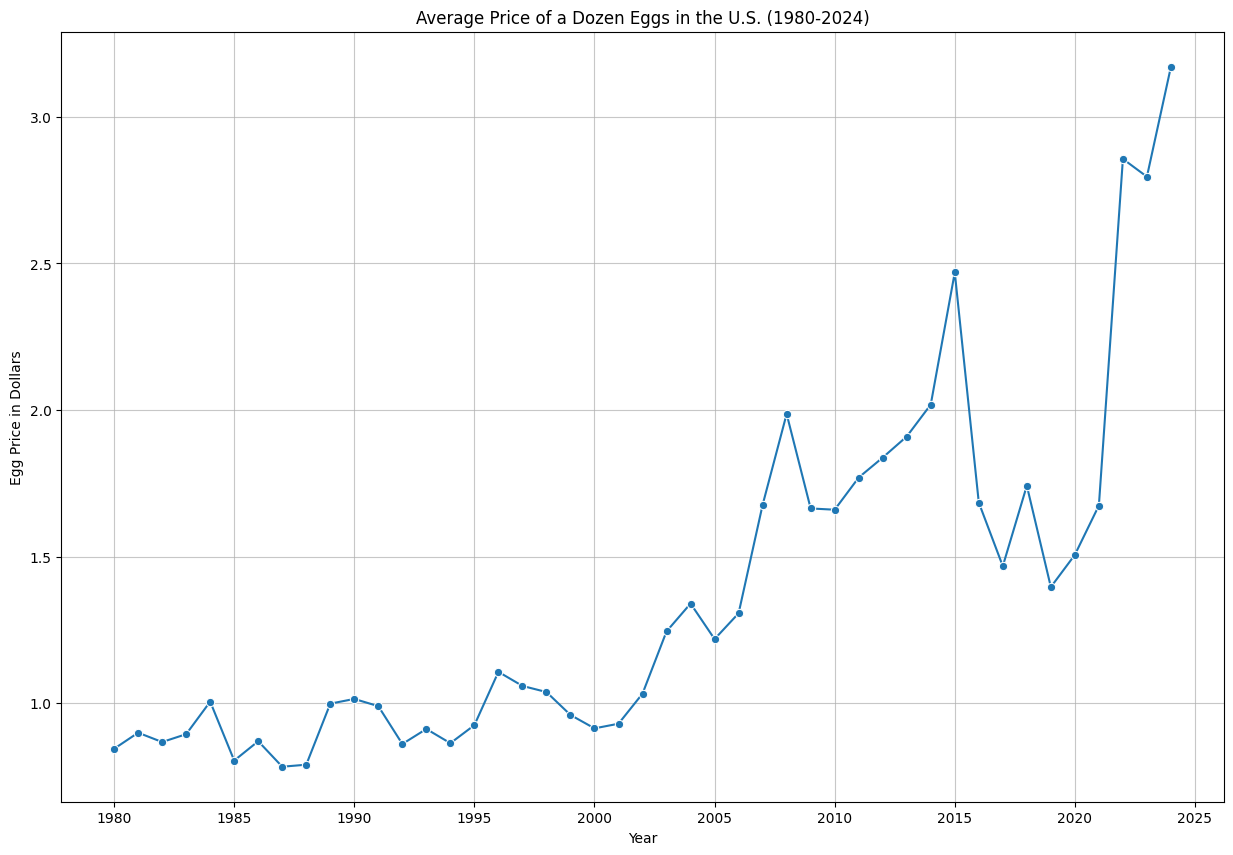

In [254]:
# Looking at egg prices from 1980 - 2024
plt.figure(figsize =(15, 10))

sns.lineplot(data = eggflation, x = "year", y = "egg_price", marker='o')

plt.title("Average Price of a Dozen Eggs in the U.S. (1980-2024)" )
plt.xlabel("Year")
plt.ylabel("Egg Price in Dollars")
plt.xticks(np.arange(1980, 2030, 5))
plt.grid(alpha = 0.7)

plt.show()

#### Average Price of a Dozen Eggs in the U.S. (1980-2024)

Over time, the price of a dozen eggs stayed under or around $1 until 2002 with a noticeable peak at 2008. 2008 is notable because of the 2008 financial crisis. There was another drastic peak in 2015 likely due to the Pathogenic Avian Influenza Outbreak which decreased the supply of eggs. Since the COVID-19 pandemic, egg prices have rapidly increased.

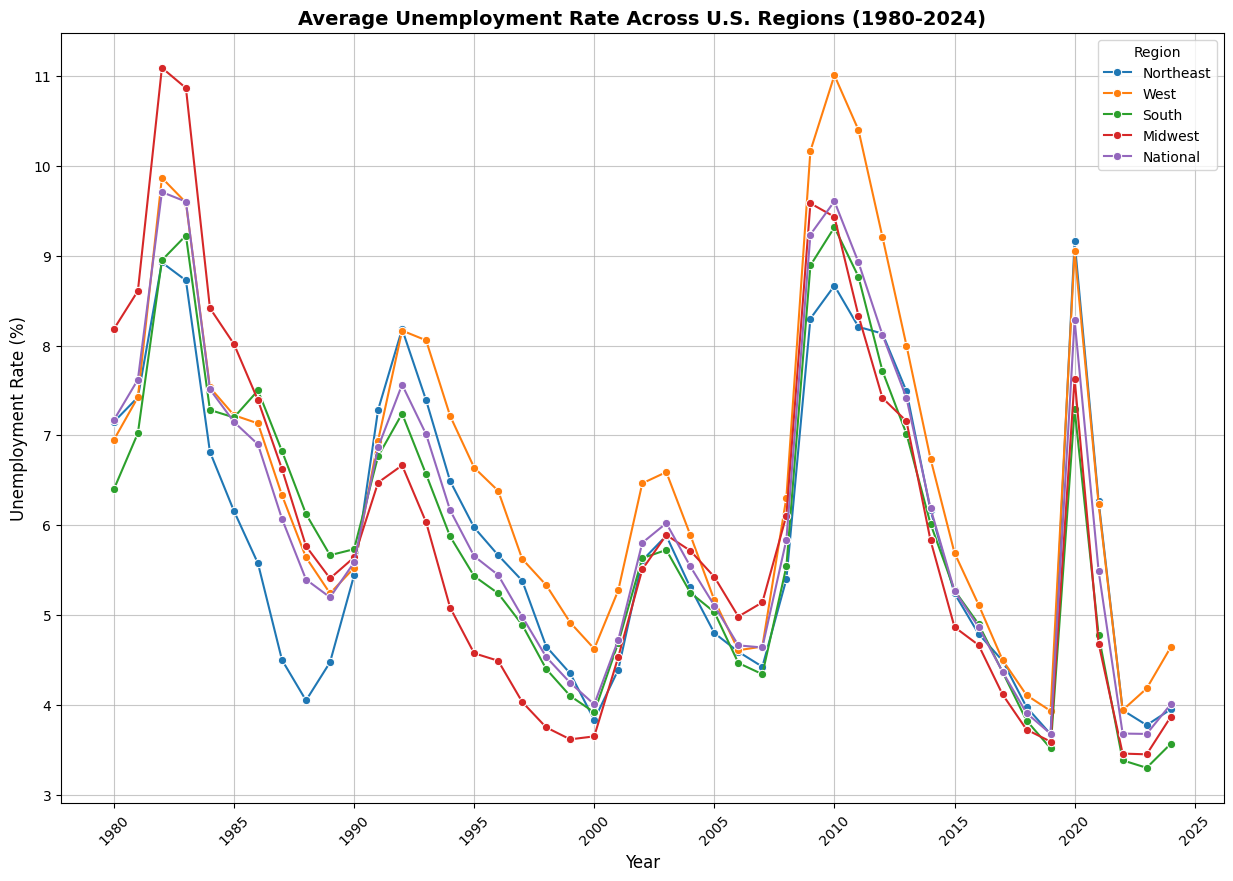

In [255]:
# The columns of interest
regions = ['northeast_unemployment', 'west_unemployment', 'south_unemployment', 'midwest_unemployment', 'national_unemployment']

# Melt the dataframe to convert it into long format for Seaborn
df_melted = eggflation.melt(id_vars=["year"], value_vars=regions, 
                            var_name="region", value_name="unemployment_rate")

# Custom legend labels mapping
custom_labels = {
    'northeast_unemployment': 'Northeast',
    'west_unemployment': 'West',
    'south_unemployment': 'South',
    'midwest_unemployment': 'Midwest',
    'national_unemployment': 'National'
}

# Plot the Line Graph
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=df_melted, x="year", y="unemployment_rate", hue="region", marker="o")

plt.title("Average Unemployment Rate Across U.S. Regions (1980-2024)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(np.arange(1980, 2030, 5), rotation=45)
plt.grid(alpha=0.7)

# Update legend with custom labels
handles, labels = ax.get_legend_handles_labels()  # Get current legend handles and labels
new_labels = [custom_labels[label] for label in labels]  # Map to custom names

plt.legend(handles=handles, labels=new_labels, title="Region")

plt.show()



#### Average Unemployment Rate Across the U.S. By Region (1980-2024)

There are many high and low points of unemployment rates across the regions in the United States. The overall trends in unemployment is downward from 1980 to the present. The high peaks seem related to economic events like 9/11 Terrorist Attack, the 2008 Financial Crisis, and the COVID-19 Pandemic. All the regions generally follow the national unemployment trends.

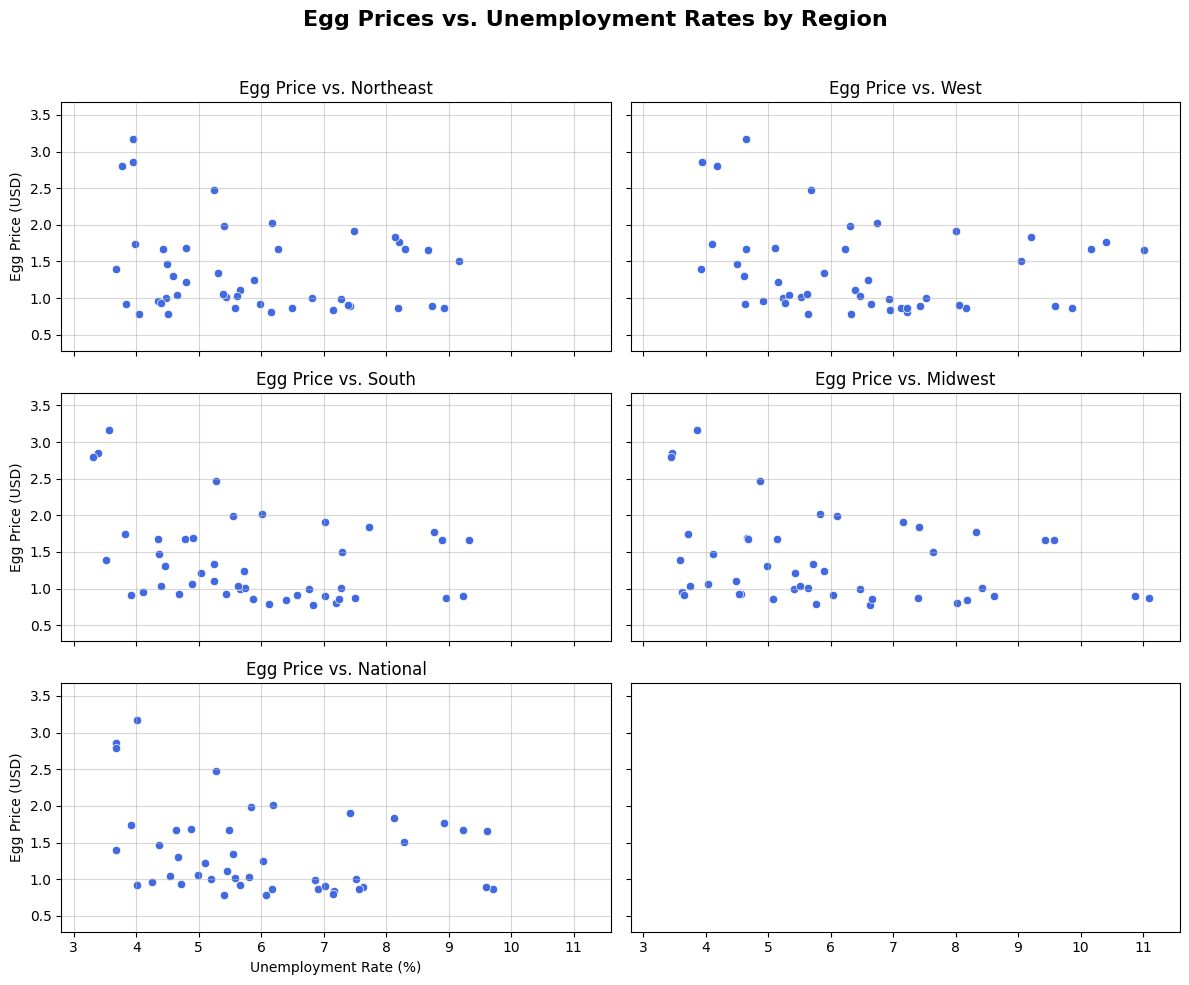

In [256]:
# Find the global min and max values for consistent axes
x_min = eggflation[regions].min().min()
x_max = eggflation[regions].max().max()
y_min = eggflation["egg_price"].min()
y_max = eggflation["egg_price"].max()

# Define the number of subplots with shared axes
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Egg Prices vs. Unemployment Rates by Region", fontsize=16, fontweight="bold")

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through regions and create a scatter plot for each
for i, region in enumerate(regions):
    sns.scatterplot(data=eggflation, x=region, y="egg_price", ax=axes[i], color="royalblue")
    
    # Titles and labels
    axes[i].set_title(f"Egg Price vs. {region.replace('_unemployment', '').capitalize()}", fontsize=12)
    axes[i].set_xlabel("Unemployment Rate (%)", fontsize=10)
    axes[i].set_ylabel("Egg Price (USD)", fontsize=10)
    axes[i].grid(alpha=0.5)

    # Set consistent x and y limits
    axes[i].set_xlim(x_min - .5, x_max + .5)
    axes[i].set_ylim(y_min - .5, y_max + .5)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent overlap with the suptitle

plt.show()



#### Egg Prices Vs. Unemployment Rates by Region

There seems to be a weak negative correlation between egg prices and the unemployment rates across U.S. regions. Many of the points are concentrated towards a lower unemployment rate and lower egg prices. 



## Descriptive Statistics

In [257]:
# Compute descriptive statistics
desc_stats = eggflation.describe().T
mode_values = eggflation.mode().iloc[0]
desc_stats["mode"] = mode_values

# Compute variance manually
desc_stats["variance"] = eggflation.var()

# Compute Interquartile Range (IQR)
Q1 = eggflation.quantile(0.25)
Q3 = eggflation.quantile(0.75)
IQR = Q3 - Q1
desc_stats["IQR"] = IQR

desc_stats

,count,mean,std,min,25%,50%,75%,max,mode,variance,IQR
year,45.0,2002.000000,13.133926,1980.000000,1991.000000,2002.000000,2013.000000,2024.000000,1980.000000,172.500000,22.000000
egg_price,45.0,1.372030,0.593509,0.782583,0.913500,1.106333,1.676250,3.171500,0.782583,0.352252,0.762750
northeast_unemployment,45.0,5.890926,1.634262,3.675000,4.491667,5.575000,7.283333,9.158333,3.675000,2.670814,2.791667
midwest_unemployment,45.0,5.989259,2.008159,3.450000,4.533333,5.641667,7.391667,11.091667,3.450000,4.032701,2.858333
south_unemployment,45.0,5.888333,1.646791,3.300000,4.691667,5.666667,7.025000,9.316667,3.300000,2.711920,2.333333
west_unemployment,45.0,6.539074,1.855003,3.933333,5.166667,6.333333,7.425000,11.008333,3.933333,3.441038,2.258333
national_unemployment,45.0,6.076898,1.721214,3.677083,4.722917,5.656250,7.170833,9.708333,4.006250,2.962577,2.447917


In [258]:
print("Descriptive Statistics")
print(desc_stats[["mean", "50%", "mode", "std", "variance", "IQR"]])

Descriptive Statistics
                               mean          50%         mode        std  \
year                    2002.000000  2002.000000  1980.000000  13.133926   
egg_price                  1.372030     1.106333     0.782583   0.593509   
northeast_unemployment     5.890926     5.575000     3.675000   1.634262   
midwest_unemployment       5.989259     5.641667     3.450000   2.008159   
south_unemployment         5.888333     5.666667     3.300000   1.646791   
west_unemployment          6.539074     6.333333     3.933333   1.855003   
national_unemployment      6.076898     5.656250     4.006250   1.721214   

                          variance        IQR  
year                    172.500000  22.000000  
egg_price                 0.352252   0.762750  
northeast_unemployment    2.670814   2.791667  
midwest_unemployment      4.032701   2.858333  
south_unemployment        2.711920   2.333333  
west_unemployment         3.441038   2.258333  
national_unemployment     2.9625

## Interpretation of Descriptive Statistics

### Egg Prices (1980-2024)
- Mean Egg Price: 1.37 per dozen
- Median Egg Price: 1.11, slightly lower than the mean, suggesting right-skewed distribution (some high-price outliers).
- Mode (Most Common Egg Price): 0.78, meaning lower egg prices were more frequent historically.
- Standard Deviation (0.59): Egg prices fluctuate, but not extremely.
- Interquartile Range (IQR = 0.76): Most egg prices are within 0.76 of each other, showing moderate variability.
- Variance (0.35): Some price fluctuations exist but not highly extreme.

### Unemployment Rates Across Regions
- The West had the highest average unemployment rates (6.54%), while the South had the lowest (5.89%)
- The Midwest has the highest standard deviation of 2.01, suggesting its unemployment rate fluctuated the most

## Graphical Analysis


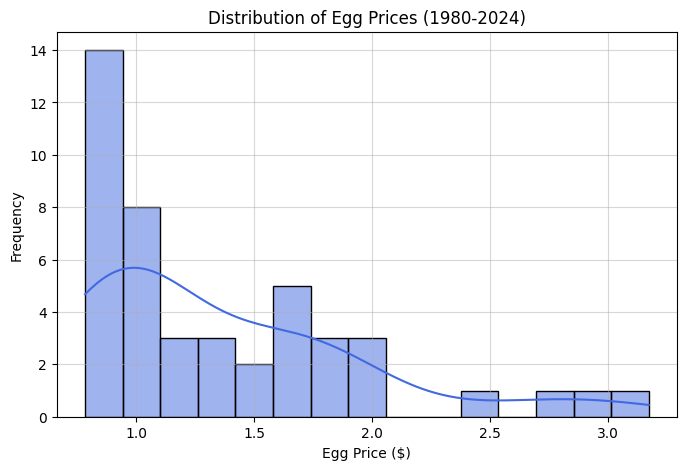

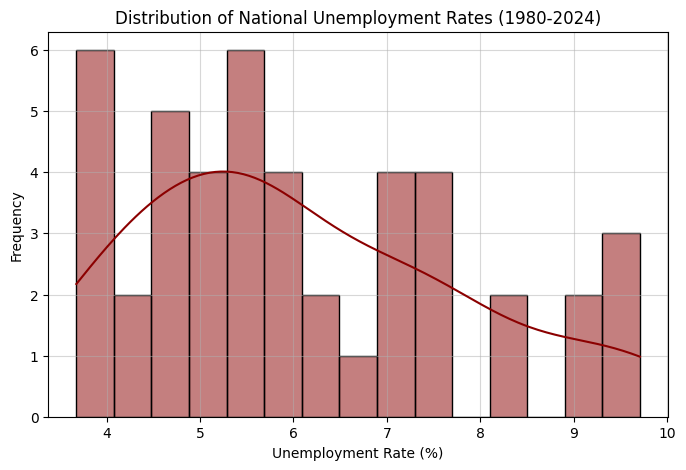

In [259]:
# Histogram for Egg Prices
plt.figure(figsize=(8,5))
sns.histplot(eggflation["egg_price"], bins=15, kde=True, color="royalblue")
plt.title("Distribution of Egg Prices (1980-2024)")
plt.xlabel("Egg Price ($)")
plt.ylabel("Frequency")
plt.grid(alpha=0.5)
plt.show()

# Histogram for National Unemployment
plt.figure(figsize=(8,5))
sns.histplot(eggflation["national_unemployment"], bins=15, kde=True, color="darkred")
plt.title("Distribution of National Unemployment Rates (1980-2024)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.grid(alpha=0.5)
plt.show()

### Understanding the Histograms

##### Distribution of Egg Prices (1980-2024)
Over time, the data is showing that it is positively skewed, and skewed to the right. This solidifies our earlier findings that there is more frequent lower prices of eggs over time, but some higher outliers effect the distribution.

##### Distribution of National Unemployment Rates(1980-2024)
For National Unemployment Rates, the histogram is slightly right skewed. The mean and median are very similar to one another, although the  mean is slightly greater (less than one standard deviation difference) than the median. 


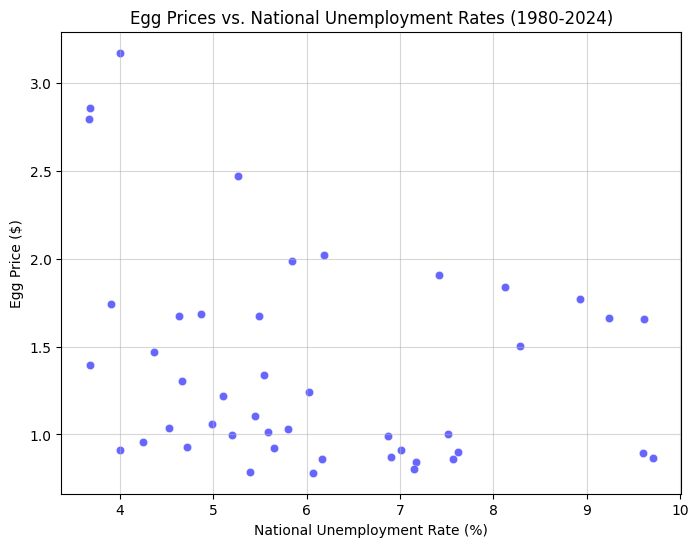

In [260]:
# Scatter plot for National Unemployment vs. Egg Prices
plt.figure(figsize=(8,6))
sns.scatterplot(data=eggflation, x="national_unemployment", y="egg_price", color="blue", alpha=0.6)
plt.title("Egg Prices vs. National Unemployment Rates (1980-2024)")
plt.xlabel("National Unemployment Rate (%)")
plt.ylabel("Egg Price ($)")
plt.grid(alpha=0.5)
plt.show()


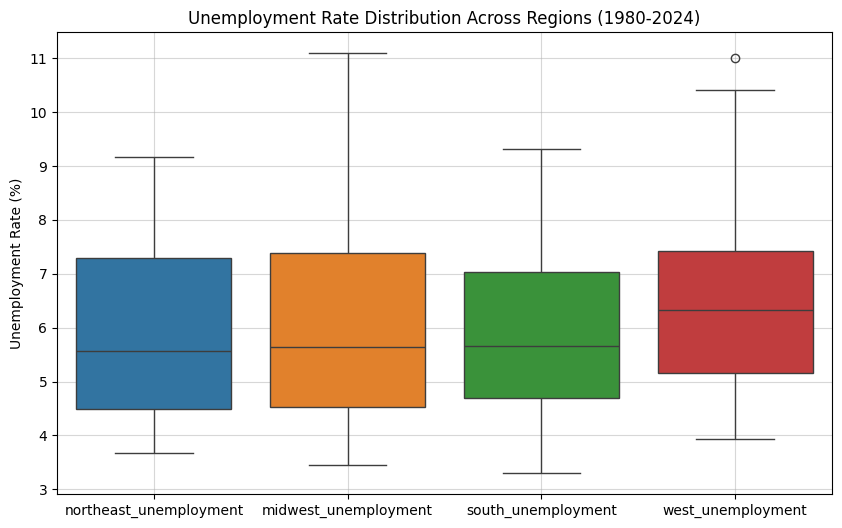

In [261]:
# Boxplot for Unemployment Rates by Region
plt.figure(figsize=(10,6))
sns.boxplot(data=eggflation[["northeast_unemployment", "midwest_unemployment", "south_unemployment", "west_unemployment"]])
plt.title("Unemployment Rate Distribution Across Regions (1980-2024)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(alpha=0.5)
plt.show()


### Boxplot for Unemployment Rates by Region

Looking at the boxplots of the unemployment ranges by region, they are all pretty similar. The median unemployment is the highest in the West for all four regions, implying that they had more periods of job instability than the other regions. The midwest is showing a the largest range of unemployment than the other regions which implies they had the highest variances of employment and unemployment rates - meaning the midwest may have been more effected by periods of economic disasters.


## Inferential Statistics

### Hypotheses & Significance Levels

**Null Hypothesis**
There is no relationship between egg prices and unemployment rates across regions in the United States from 1980-2024

**Alternative Hypothesis**
There is a relationship between egg prices and unemployment rates across regions in the United States from 1980-2024

**Significance Levels**
Alpha = 0.05 (To balance the risk of type I and type II errors)


In [262]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficients & p-values
correlations = {}
for region in ["national_unemployment", "northeast_unemployment", "midwest_unemployment", "south_unemployment", "west_unemployment"]:
    corr, p_value = pearsonr(eggflation[region], eggflation["egg_price"])
    correlations[region] = {"Pearson Correlation": corr, "p-value": p_value}

# Convert results to DataFrame for readability
correlation_df = pd.DataFrame.from_dict(correlations, orient="index")
print("Correlation Results (Egg Prices vs. Unemployment)")
print(correlation_df)


Correlation Results (Egg Prices vs. Unemployment)
                        Pearson Correlation   p-value
national_unemployment             -0.261932  0.082187
northeast_unemployment            -0.200715  0.186152
midwest_unemployment              -0.280903  0.061601
south_unemployment                -0.325698  0.029015
west_unemployment                 -0.202094  0.183082


### Analysis of Pearson Correlation

Each relationship between egg prices and unemployment rates per region show a very weak negative relationship between the price of eggs and unemployment. No p-value was significant, besides the south unemployment rates and the price of eggs. Each Pearson Correlation was very similar with ranges being between **-.20 to -.33**. These weak relationships show that as unemployment rates rise, egg prices slightly decrease. However, because the p-value is insignificant for each region besides the south, it would mean that other factors that can explain the fluctuation in egg prices. For example, bird-flu, rising production cost, or other supply chain issues. 

In [263]:
import statsmodels.api as sm

X = eggflation["national_unemployment"]
y = eggflation["egg_price"]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              egg_price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.167
Date:                Tue, 08 Apr 2025   Prob (F-statistic):             0.0822
Time:                        14:17:44   Log-Likelihood:                -38.271
No. Observations:                  45   AIC:                             80.54
Df Residuals:                      43   BIC:                             84.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.92

### Understanding the Regression Analysis

The R-squared value of 0.069 indicates that only 6.9% of the variance in egg prices is explained by national unemployment, suggesting no relationship at all between the variables. The p-value of 0.082 suggests that the relationship between national unemployment and egg prices is not statistically significant at 0.05.

In [264]:
import scipy.stats as stats

# Perform ANOVA to test if mean unemployment differs by region
anova_result = stats.f_oneway(
    eggflation["northeast_unemployment"],
    eggflation["midwest_unemployment"],
    eggflation["south_unemployment"],
    eggflation["west_unemployment"]
)

# Print ANOVA results
print("ANOVA Results (Unemployment Differences Across Regions)")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA Results (Unemployment Differences Across Regions)
F-statistic: 1.360075271307052, p-value: 0.2566395559765311


### Is there a significant difference in unemployment rates across regions?

F-statistic (1.36): This measures the variance between regional unemployment rates compared to the variance within regions. 
p-value (0.257): This represents the probability that the observed differences are due to random chance. Since 0.257 is greater than our 0.05 threshold, we fail to reject the null hypothesis.

**Conclusion:**
There is no statistically significant difference in unemployment rates across regions. In other words, the variation in unemployment between regions is not large enough to confidently say that region impacts unemployment levels.

## Comparative Analysis

### Comparing Egg Prices Across Economic Periods

In [265]:
# Major economic periods
recession_years = [1980, 1981, 1990, 1991, 2001, 2008, 2009, 2020]
stable_years = [year for year in eggflation["year"] if year not in recession_years]

# Create a new column categorizing economic periods
eggflation["economic_period"] = eggflation["year"].apply(lambda x: "Recession" if x in recession_years else "Stable")

# Compare mean egg prices during recessions vs. stable years
recession_stats = eggflation.groupby("economic_period")["egg_price"].describe()
print("Egg Price Statistics by Economic Period")
print(recession_stats)


Egg Price Statistics by Economic Period
                 count      mean       std       min       25%       50%  \
economic_period                                                            
Recession          8.0  1.228906  0.429391  0.843833  0.921667  1.001583   
Stable            37.0  1.402975  0.623814  0.782583  0.913500  1.218167   

                      75%     max  
economic_period                    
Recession        1.545312  1.9865  
Stable           1.684167  3.1715  


### Egg Price Statistics by Economic Period

During recessions, the average egg price was **\$1.23** with a standard deviation of **\$0.43**, whereas during stable economic periods, the average price was **\$1.40** with a higher standard deviation of **\$0.62**. This suggests that egg prices were slightly lower and more stable during recessions, while prices varied more widely in stable periods.

### Comparing Egg Prices Across Different Unemployment Levels

In [266]:
# Define high and low unemployment years (median split)
median_unemployment = eggflation["national_unemployment"].median()
eggflation["unemployment_category"] = eggflation["national_unemployment"].apply(lambda x: "High Unemployment" if x > median_unemployment else "Low Unemployment")

# Compare egg prices across high vs. low unemployment years
unemployment_comparison = eggflation.groupby("unemployment_category")["egg_price"].describe()
print("Egg Prices During High vs. Low Unemployment Years")
print(unemployment_comparison)


Egg Prices During High vs. Low Unemployment Years
                       count      mean       std       min       25%  \
unemployment_category                                                  
High Unemployment       22.0  1.237027  0.452561  0.782583  0.867521   
Low Unemployment        23.0  1.501163  0.688000  0.789500  1.005875   

                            50%       75%     max  
unemployment_category                              
High Unemployment      0.996958  1.662917  2.0185  
Low Unemployment       1.306250  1.680208  3.1715  


During **high unemployment years**, the average egg price was **\$1.24** with a standard deviation of **\$0.45**, while during **low unemployment years**, the average price was **\$1.50** with a higher standard deviation of **\$0.69**. This suggests that egg prices were generally lower and more stable during high unemployment periods but higher and more variable when unemployment was low. 

Essentially, they need people to continue buying eggs/contributing to the economy so the price of eggs needs to be lower. During recessions, people are more reluctant to spend, but eggs are a staple food item. It also shows that when there is low unemployment rates, the cost of eggs can vary greatly, because people are more willing to spend money

## Multivariate Analysis

In [267]:
# Create a pivot table to explore relationships
pivot_table = eggflation.pivot_table(values="egg_price", 
                                     index="year", 
                                     columns=["economic_period", "unemployment_category"], 
                                     aggfunc="mean")

# Display pivot table
print("Egg Prices Across Economic Conditions")
# Cleaned Pivot Table Dropping Nan Values
cleaned_pivot_df = pivot_table.dropna(how='all')

cleaned_pivot_df


Egg Prices Across Economic Conditions


economic_period               Recession                             Stable  \
unemployment_category High Unemployment Low Unemployment High Unemployment   
year                                                                         
1980                           0.843833              NaN               NaN   
1981                           0.898667              NaN               NaN   
1982                                NaN              NaN          0.866833   
1983                                NaN              NaN          0.893667   
1984                                NaN              NaN          1.004667   
1985                                NaN              NaN          0.803583   
1986                                NaN              NaN          0.869583   
1987                                NaN              NaN          0.782583   
1988                                NaN              NaN               NaN   
1989                                NaN              NaN               NaN   
1990                                NaN         1.013917               NaN   
1991                           0.989250              NaN               NaN   
1992                                NaN              NaN          0.860167   
1993                                NaN              NaN          0.911417   
1994                                NaN              NaN          0.862833   
1995                                NaN              NaN               NaN   
1996                                NaN              NaN               NaN   
1997                                NaN              NaN               NaN   
1998                                NaN              NaN               NaN   
1999                                NaN              NaN               NaN   
2000                                NaN              NaN               NaN   
2001                                NaN         0.929333               NaN   
2002                                NaN              NaN          1.032000   
2003                                NaN              NaN          1.244417   
2004                                NaN              NaN               NaN   
2005                                NaN              NaN               NaN   
2006                                NaN              NaN               NaN   
2007                                NaN              NaN               NaN   
2008                           1.986500              NaN               NaN   
2009                           1.664000              NaN               NaN   
2010                                NaN              NaN          1.659667   
2011                                NaN              NaN          1.769500   
2012                                NaN              NaN          1.837667   
2013                                NaN              NaN          1.909500   
2014                                NaN              NaN          2.018500   
2015                                NaN              NaN               NaN   
2016                                NaN              NaN               NaN   
2017                                NaN              NaN               NaN   
2018                                NaN              NaN               NaN   
2019                                NaN              NaN               NaN   
2020                           1.505750              NaN               NaN   
2021                                NaN              NaN               NaN   
2022                                NaN              NaN               NaN   
2023                                NaN              NaN               NaN   
2024                                NaN              NaN               NaN   

economic_period                         
unemployment_category Low Unemployment  
year                                    
1980                               NaN  
1981                               NaN  
1982                               NaN  
1983     

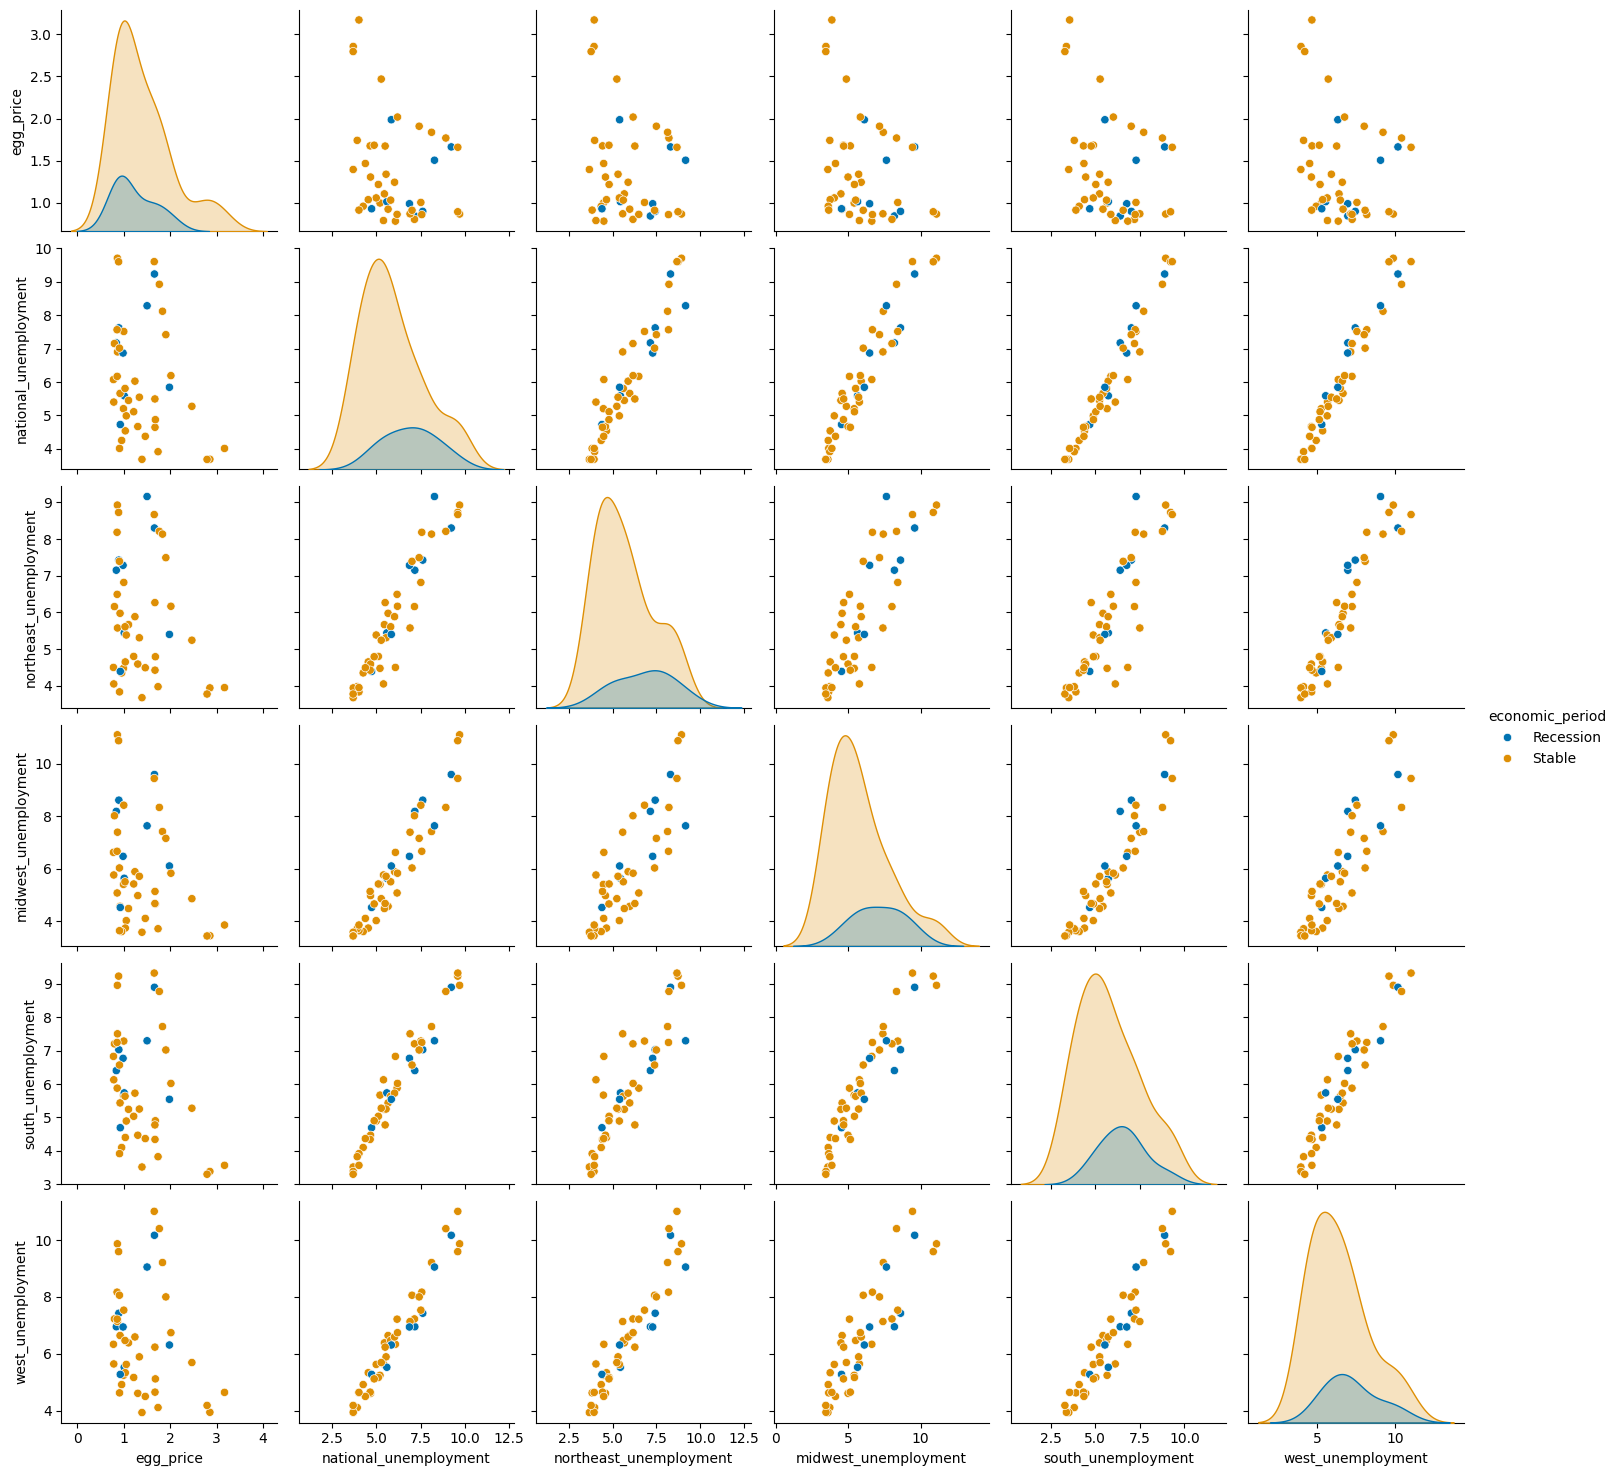

In [268]:
# Pairplot for multivariate visualization
sns.pairplot(eggflation, vars=["egg_price", "national_unemployment", 
                               "northeast_unemployment", "midwest_unemployment", 
                               "south_unemployment", "west_unemployment"], 
             hue="economic_period", palette="colorblind")

plt.show()


The pair plot shows the relationships between egg prices, national unemployment, and regional unemployment rates. There is a weak negative correlation between egg prices and unemployment, suggesting that egg prices tend to be lower during high unemployment periods. Unemployment rates across regions are highly correlated with national unemployment, as seen in the strong linear relationships. The KDE plots reveal that egg prices were more stable and slightly lower during recessions, while they fluctuated more in stable periods. Higher unemployment values cluster in recession periods, reinforcing the expected economic trend. While unemployment appears to influence egg prices, the scatter plots suggest other factors likely play a more significant role in price variation.

In [269]:
# Define independent variables (regional unemployment rates) and dependent variable (egg price)
X = eggflation[["northeast_unemployment", "midwest_unemployment", "south_unemployment", "west_unemployment"]]
y = eggflation["egg_price"]
X = sm.add_constant(X)

# Fit Multiple Linear Regression Model
multi_reg_model = sm.OLS(y, X).fit()

# Print regression summary
print(multi_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:              egg_price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.907
Date:                Tue, 08 Apr 2025   Prob (F-statistic):            0.00904
Time:                        14:17:48   Log-Likelihood:                -32.449
No. Observations:                  45   AIC:                             74.90
Df Residuals:                      40   BIC:                             83.93
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

### Analysis of Multivariate Regression Analysis

R-squared (0.281): About 28.1% of the variation in egg prices is explained by unemployment rates in different regions, suggesting a moderate relationship.
Adjusted R-squared (0.209): After adjusting for the number of predictors, the explanatory power slightly drops to 20.9%, indicating some potential overfitting.
F-statistic (3.907, p = 0.00904): The model is statistically significant, meaning that at least one of the unemployment predictors is significantly related to egg prices.
Intercept (2.236, p < 0.001): If all regional unemployment rates were zero, the predicted egg price would be $2.24.
Northeast Unemployment (-0.2045, p = 0.209): A higher unemployment rate in the Northeast is associated with a slight decrease in egg prices, but this relationship is not statistically significant.
Midwest Unemployment (0.2060, p = 0.124): A higher unemployment rate in the Midwest is associated with a small increase in egg prices, but this effect is not significant.
South Unemployment (-0.8284, p = 0.002): A higher unemployment rate in the South is significantly associated with a decrease in egg prices, with a strong negative effect.
West Unemployment (0.6093, p = 0.009): A higher unemployment rate in the West is significantly associated with an increase in egg prices.

##### Summary:
This model suggests that unemployment in the South has a strong negative effect on egg prices, while unemployment in the West has a significant positive effect. However, unemployment in the Northeast and Midwest does not significantly impact egg prices. While the model is statistically significant overall, the relatively low R-squared suggests that other factors beyond unemployment rates likely influence egg prices.

## Conclusion

We began by using descriptive statistics to establish a general understanding of the data, examining egg prices and unemployment rates over a 40-year period. Our focus was on the mean national egg prices and mean regional unemployment rates per year. We also averaged unemployment rates nationally to compare regional trends against the overall pattern. Our analysis revealed a weak negative Pearson correlation between egg prices and unemployment, a finding reinforced by regression and ANOVA tests. When comparing egg prices to regional unemployment, we found that the South was the only region where unemployment had a significant negative effect on egg prices. However, our multiple regression model explained just 28% of egg price variation, indicating that unemployment alone is not a primary driving force behind the valuation of eggs. To improve the model, additional factors such as inflation, recessions, national crises, and Federal Reserve rate changes could be incorporated to better capture the economic influences on egg prices. 

## Reflection

We failed to reject the null hypothesis that there is no correlation between egg prices and unemployment rates, meaning we did not find strong statistical evidence of a relationship. We observed no correlation and it there was no statistically significant relationships. Initially, we expected the data to confirm a positive relationship between rising egg prices and increasing unemployment, given widespread media coverage of both. However, our analysis did not support this assumption. Some regions, such as the West and Midwest, experienced greater employment volatility during economic downturns. However, egg price fluctuations did not appear to be directly driven by these changes, suggesting that other economic factors played a more significant role in price volatility.

One of the biggest challenges of this project was confronting the limitations of our dataset and the complexity of economic relationships. We approached this analysis with the assumption that unemployment and egg prices would be linked, given the strong media coverage. After all, economic downturns impact consumer behavior, supply chains, and production costs. However, as we worked through the data, we realized that price fluctuations were likely influenced by a broader set of variables that were not captured in our analysis. We do not know what those other factors are, which is slightly frustrating. In order to understand this problem further, we would need to gather many more datasets that look into several other factors. For example, looking into bird-flu outbreaks, which has proven to be an extremely trying dataset to find. Although this is just an idea we have about what could potentially impact the price of eggs, it is simply an idea and nothing further. We do not have the evidence to back up this theory and to move forward, we would need to conduct an entirely new analysis.

Another difficulty was interpreting regional disparities. Some regions, such as the West and Midwest, experienced greater employment volatility during economic downturns, yet this volatility did not translate into clear patterns in egg pricing. This forced us to reconsider whether our initial hypothesis was too simplistic and whether other economic indicators, such as wage growth, consumer demand, or government subsidies, might offer better insights.

This project highlighted the challenge of isolating causation in economic data. While the media often presents economic trends as interconnected, the reality is far more nuanced. Our inability to find a significant correlation between unemployment and egg prices was not necessarily a failure but rather a lesson in the complexity of economic analysis. It underscored the importance of looking beyond surface-level narratives and considering a wider range of factors when attempting to understand price fluctuations.



# Part III

## Preprocessing

### Preprocessing Pipelines


In [270]:
eggflation.head()

,year,egg_price,northeast_unemployment,midwest_unemployment,south_unemployment,west_unemployment,national_unemployment,economic_period,unemployment_category
0,1980,0.843833,7.150000,8.183333,6.400000,6.950000,7.170833,Recession,High Unemployment
1,1981,0.898667,7.425000,8.608333,7.025000,7.425000,7.620833,Recession,High Unemployment
2,1982,0.866833,8.925000,11.091667,8.950000,9.866667,9.708333,Stable,High Unemployment
3,1983,0.893667,8.725000,10.866667,9.225000,9.591667,9.602083,Stable,High Unemployment
4,1984,1.004667,6.816667,8.416667,7.283333,7.533333,7.512500,Stable,High Unemployment


In [271]:
eggflation.describe()

,year,egg_price,northeast_unemployment,midwest_unemployment,south_unemployment,west_unemployment,national_unemployment
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2002.000000,1.372030,5.890926,5.989259,5.888333,6.539074,6.076898
std,13.133926,0.593509,1.634262,2.008159,1.646791,1.855003,1.721214
min,1980.000000,0.782583,3.675000,3.450000,3.300000,3.933333,3.677083
25%,1991.000000,0.913500,4.491667,4.533333,4.691667,5.166667,4.722917
50%,2002.000000,1.106333,5.575000,5.641667,5.666667,6.333333,5.656250
75%,2013.000000,1.676250,7.283333,7.391667,7.025000,7.425000,7.170833
max,2024.000000,3.171500,9.158333,11.091667,9.316667,11.008333,9.708333


In [272]:
eggflation['egg_category'] = pd.cut(eggflation["egg_price"], bins=4, labels=["Low", "Medium", "High", "Very High"])

In [273]:
eggflation['egg_category'].value_counts()

egg_category
Low          27
Medium       12
High          3
Very High     3
Name: count, dtype: int64

In [274]:
X = eggflation[['year','economic_period', 'unemployment_category']]
y = eggflation['egg_category']

In [275]:
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='median')), 
    ('scale',StandardScaler())
    ])

In [276]:
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['year']),
    ('cat', OneHotEncoder(drop='if_binary'), ['economic_period', 'unemployment_category'])])

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)

### Preprocessing Justification

We learned from earlier steps that our data had no missing values. We also learned that the price of eggs did not correlate with the unemployment rates regionally or nationally. However, we are still interested in understanding if the price of eggs can be predicted given a particular economic circumstance (ie: recession or stable economy, and levels of unemployment). 

Although we ensured that our data has been thoroughly cleaned prior to training the model, to add an extra layer of certainty, we used a median value to account for any null or missing values for the price of eggs. Ideally this wouldn't be necessary, but this serves as a precaution. 

##### Logistic Regression Model

In [279]:
clf = LogisticRegression() # instantiate the classifier

clf.fit(X_train_prepared, y_train) # fit the model
print(f"{clf.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

77.78% accuracy


In [280]:
print(confusion_matrix(y_test, clf.predict(X_test_prepared)))

[[0 0 1 0]
 [0 5 0 0]
 [0 0 2 0]
 [0 0 1 0]]


In [281]:
print(classification_report(y_test, clf.predict(X_test_prepared)))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       1.00      1.00      1.00         5
      Medium       0.50      1.00      0.67         2
   Very High       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.38      0.50      0.42         9
weighted avg       0.67      0.78      0.70         9



c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

##### Random Forest

In [282]:
clf2 = RandomForestClassifier()
clf2.fit(X_train_prepared, y_train) # fit the model
print(f"{clf2.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

66.67% accuracy


#### MLP Classifier

In [283]:
clf3 = MLPClassifier()

clf3.fit(X_train_prepared, y_train) # fit the model
print(f"{clf3.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

77.78% accuracy


c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### SVC

In [284]:
clf4 = SVC()

clf4.fit(X_train_prepared, y_train) # fit the model
print(f"{clf4.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

77.78% accuracy


#### Gaussian Process Classifier

In [285]:
clf5 = GaussianProcessClassifier()

clf5.fit(X_train_prepared, y_train) # fit the model
print(f"{clf5.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

77.78% accuracy


#### Decision Tree Classifier

In [286]:
clf6 = DecisionTreeClassifier()
clf6.fit(X_train_prepared, y_train) # fit the model
print(f"{clf6.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

88.89% accuracy


#### K Neighbors Classifier

In [287]:
clf7 = KNeighborsClassifier()

clf7.fit(X_train_prepared, y_train) # fit the model
print(f"{clf7.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

77.78% accuracy


#### Ada Boost Classifier

In [288]:
clf8 = AdaBoostClassifier()
clf8.fit(X_train_prepared, y_train) # fit the model
print(f"{clf8.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

77.78% accuracy


#### Gaussian NB

In [289]:
clf9 = GaussianNB()
clf9.fit(X_train_prepared, y_train) # fit the model
print(f"{clf9.score(X_test_prepared, y_test):.2%} accuracy") # evaluate the model

66.67% accuracy


## The Scores

- Decision Tree Classifier : 88.89%
- Logistic Regression, MLP Classifier, SVC, Gaussian Process, K Neighbors, Ada Boost: 77.78%
- Gaussian NB, Random Forest Classifier:: 66.67%

## Tuning Models

In [290]:
# Pipeline for Decision Tree with preprocessing
decisiontree_pipeline = Pipeline([
    ('prep', preprocessing_pipeline),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Corrected parameter grid to search
decisiontree_params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['auto', 'sqrt', 'log2'],
    'clf__class_weight': [None, 'balanced'],
    'clf__splitter': ['best', 'random'],
    'prep__cat__drop': [None, 'if_binary']  # Adjusted for the correct pipeline step name
}

# Run grid search
decisiontree_grid = GridSearchCV(
    estimator=decisiontree_pipeline,
    param_grid=decisiontree_params,
    scoring='accuracy',
    cv=5
)
decisiontree_grid.fit(X_train, y_train)

# Best results
print("Best Decision Tree Accuracy (CV):", decisiontree_grid.best_score_)
print("Best Parameters:", decisiontree_grid.best_params_)


c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Decision Tree Accuracy (CV): 0.8892857142857142
Best Parameters: {'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__splitter': 'best', 'prep__cat__drop': 'if_binary'}


c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\i2obb\Documents\um

In [291]:
# Pipeline for Logistic Regression with preprocessing
logreg_pipeline = Pipeline([
    ('prep', preprocessing_pipeline),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Parameter grid to search
logreg_params = {
    'clf__C': [0.01, 0.1, 1, 10, 100],          # Regularization strength (lower = more regularized)
    'clf__solver': ['liblinear', 'lbfgs']       # Different optimizers
}

# Run grid search
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=3, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# Best results
print("Best Logistic Regression Accuracy (CV):", logreg_grid.best_score_)
print("Best Parameters:", logreg_grid.best_params_)

c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best Logistic Regression Accuracy (CV): 0.8611111111111112
Best Parameters: {'clf__C': 1, 'clf__solver': 'liblinear'}


In [292]:
# Pipeline for SVC with preprocessing
svc_pipeline = Pipeline([
    ('prep', preprocessing_pipeline),
    ('clf', SVC(probability=True))  # set probability=True so we can use 'soft' voting later
])

# Define grid of parameters to search
svc_params = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto'],
    'clf__kernel': ['rbf', 'linear']
}

# Run grid search
svc_grid = GridSearchCV(svc_pipeline, svc_params, cv=3, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)

# Best results
print("Best SVC Accuracy (CV):", svc_grid.best_score_)
print("Best SVC Parameters:", svc_grid.best_params_)

Best SVC Accuracy (CV): 0.861111111111111
Best SVC Parameters: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


## Final Ensemble

In [293]:
final_ensemble = VotingClassifier(estimators=[
    ('logreg', logreg_grid.best_estimator_),
    ('decisiontree', decisiontree_grid.best_estimator_),
    ('svc', svc_grid.best_estimator_)
], voting='hard')  # Use soft to average probabilities

# Train the ensemble
final_ensemble.fit(X_train, y_train)

# Evaluate on holdout set
ensemble_preds = final_ensemble.predict(X_test)
print("Final Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test, ensemble_preds))


Final Ensemble Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       1.00      1.00      1.00         5
      Medium       0.50      0.50      0.50         2
   Very High       0.50      1.00      0.67         1

    accuracy                           0.78         9
   macro avg       0.50      0.62      0.54         9
weighted avg       0.72      0.78      0.74         9



c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\i2obb\Documents\umich\courses\SI618\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

# Analysis

## Tuned Model Performance

#### Decision Tree

The original model was 88.89%. The final tuned model score went up slightly to 88.92%. We believe that this particular model performed the best because our particular dataset is low dimensional. With decision trees, it can find good splits without overfitting the data. Decision trees also handle categorical variables well. In our case, our we changed our egg prices to categorical variables of "Low", "Medium", "High", and "Very High." 

#### Logistic Regression & SVC

While the alternative models improved from 77.78% to 86.11% after tuning, they still lagged behind the decision tree’s 88.92% performance because the dataset's low dimensionality and categorical features favored the tree's inherent ability to find optimal splits and model feature interactions directly. Decision trees excel at handling discrete variables, especially when egg prices were recoded into distinct categories like “Low,” “Medium,” “High,” and “Very High”, whereas other models often rely on assumptions about linearity or smooth decision boundaries that may not capture these nuances as effectively.

## Final Ensemble Performance

The accuracy of the ensemble model is 77.78%, which suggests that combining various models underperforms individual models on the test dataset. Therefore the model that performs the best is the tuned decision tree.